# Lab 1 point operations and Histograms

### Function definitions

First, we will perform the required imports.

In [3]:
import skimage
from skimage import io,exposure
import numpy as np
import matplotlib.pyplot as plt

Let us retrieve the data (images) from a dropbox source. 

In [4]:
!rm -fr sample_data
!wget -q -O barbara.tif https://www.dropbox.com/s/psz6y4k7evu8zbp/barbara.tif?dl=0
!wget -q -O child.tif https://www.dropbox.com/s/nn1488dajgmjwvx/child.tif?dl=0
!wget -q -O tire.tif https://www.dropbox.com/s/7w2i05mx455y6z9/tire.tif?dl=0
!wget -q -O liftingbody.png https://www.dropbox.com/s/cu9o763jzu6luww/liftingbody.png?dl=0
!wget -q -O rice.png https://www.dropbox.com/s/ag2gxbf7qitdi41/rice.png?dl=0
!wget -q -O Winter_Forest.jpg https://www.dropbox.com/s/ecaszn4qbpp0sh0/Winter_Forest.jpg?dl=0

'rm' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


Next, a function to plot a histogram, as we will repeat this action many times.

In [5]:
def plot_histogram(img,title):
  histogram, bin_edges = np.histogram(img, bins=256, range=(0, img.max()))

  # configure and draw the histogram figure
  plt.figure()
  plt.title(title)
  plt.xlabel("grayscale value")
  plt.ylabel("pixels")
  plt.xlim([0, img.max()])  # <- named arguments do not work here

  plt.plot(bin_edges[0:-1], histogram)  # <- or here
  plt.show()


We will proceed to write a function which stretches a range $[f1,f2]$, into the range $[g1,g2]$. Next we are going to extend the function so that it will also transfer the ranges $[0,f1]$ and $[f2,255]$ to the ranges $[0,g1]$ and $[g2,255]$, respectively. Finally, we will take care of an image of a dynamic range of $[0,1]$, as well. 

In [6]:
def contrast_streach(img,f1,f2,g1,g2):
  # A function to straech the contrast of an image.
  # inputs:
  #   img:    The image to be streached.
  #   f1,f2:  These are the limits of the range to be streached. The limits are assumed to be with respect to the dynamic range of the image.
  #   g1,g2:  These are the new limits of the streached range. The limits are assumed to be with respect to the dynamic range of the image.
  # Outputs:
  #   out_img:  The streached-range image. 
  
  # If the dynamic range of the image is [0,1], transfer the range into [0,255]. The flag will help us to reverse this at the end of the function.
  zero_one_f = False;
  if img.max()<=1:
    zero_one_f = True;
    img = img*255;
    f1 = f1*255;
    f2 = f2*255;
    g1 = g1*255;
    g2 = g2*255;

  # Output image:
  out_img = np.zeros(img.shape)


  # Extract the indices for the requested range:
  indices = np.where(np.logical_and(f1<=img,img<=f2));
  # Normalize the samples:
  out_img[indices] = (img[indices]-f1)/(f2-f1)*(g2-g1)+g1;

  # Repeat for the range [0,f1] to [0,g1]
  indices = np.where(np.logical_and(0<=img,img<=f1));
  out_img[indices] = img[indices]/f1*g1;

  # Repeat for the range [f2,255] to [g2,255].
  indices = np.where(np.logical_and(f2<=img,img<=256));
  out_img[indices] = ((img[indices]-f2)/(256-f2)*(256-g2))+g2;

  # We remember that images with the dynamic range of [0,256] requiere integer levels. Either we round, or go back to the [0,1] range.
  if zero_one_f:
    out_img = out_img/256;
  else:
    out_img = np.round(out_img);
  
  return out_img



We now proceed to define a function for gamma correction. We remember that the image has to be in the dynamic range of $[0,1]$. If the image is within the range $[0,256]$, we will transform and return. 

In [7]:
def gamma_correction(img,gamma):
  # A function for image gamma correction.
  # inputs:
  #   img:    The image to be streached.
  #   gamma:  gamma value.
  # Outputs:
  #   out_img:  The streached-range image. 
  
  # If the dynamic range of the image is [0,255], transfer the range into [0,1]. The flag will help us to reverse this at the end of the function.
  none_zero_one_f = False;
  if img.max()>1:
    none_zero_one_f = True;
    img = img/256;

  # Output image:
  out_img = np.power(img,gamma);

  if none_zero_one_f:
    out_img = np.round(out_img*255);
  
  return out_img
  


The third function is a thresholding function. This function cuts the image with respect to a threshold and returns a binary image with values of $1$ for pixels above the threshold and $0$ below the threshold. We arbitrarily set the values of pixels with the threshold value to $1$, though this can be defined the other way around. 

In [8]:
def thresholding(img,thresh):
  # A function for image thresholding.
  # inputs:
  #   img:    The image to be streached.
  #   thresh: Threshold value.
  # Outputs:
  #   out_img:  The streached-range image. 
  
  # Output image:
  out_img = np.zeros(img.shape);
  out_img[img>=thresh] = 1;

  return out_img
  

### Evaluating our functions

Load the 'chil.tif' image and plot the histogram. Note that this code depends on the location of your image. 

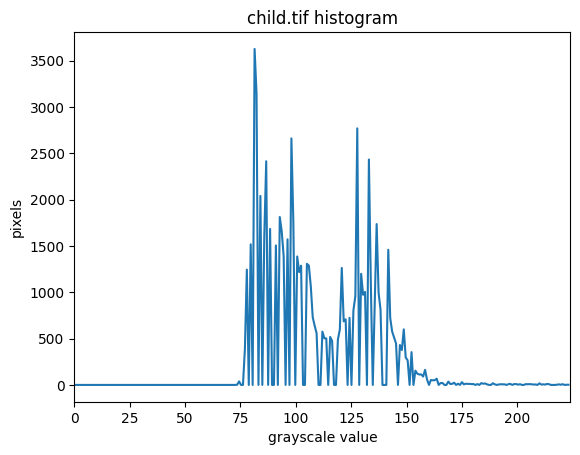

In [9]:
I1 = io.imread('child.tif');
plot_histogram(I1,'child.tif histogram');



We note that the histogram is within the approximate range of 70 to 180. A little trial and error Will find nice results. 

In [10]:
f1 = 74;
f2 = 170;
g1 = 0;
g2 = 255;
I1_streached = contrast_streach(I1,f1,f2,g1,g2);
plot_histogram(I1_streached,'child.tif histogram after contrast streach');

After setting on the range $[74,170]$, we will stretch the contrast of the image into $[0,256]$, and plot the results.

In [11]:
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I1,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(122);
plt.imshow(I1_streached,cmap='gray');
ax.set_title("Contrast streached");

Read the 'tire.tif' image and plot the histogram. 

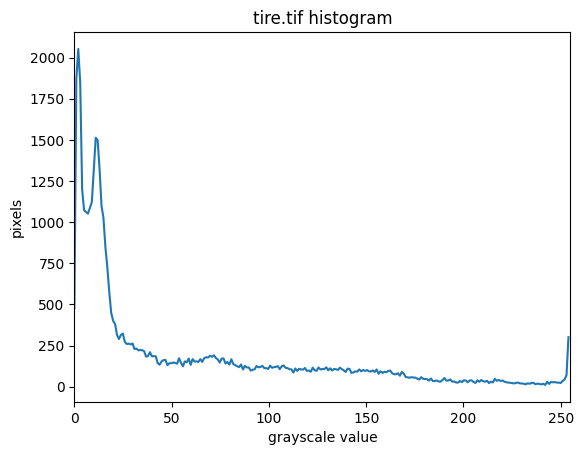

In [12]:
I2 = io.imread('tire.tif');
plot_histogram(I2,'tire.tif histogram');

The problem here is that the histogram is concentrated in the dark area. This means that it will be hard to notice dark details on a slightly darker\lighter background. A gamma correction should help correct this state. 

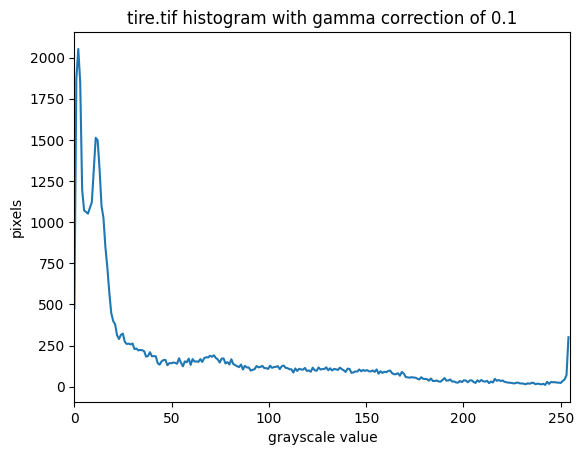

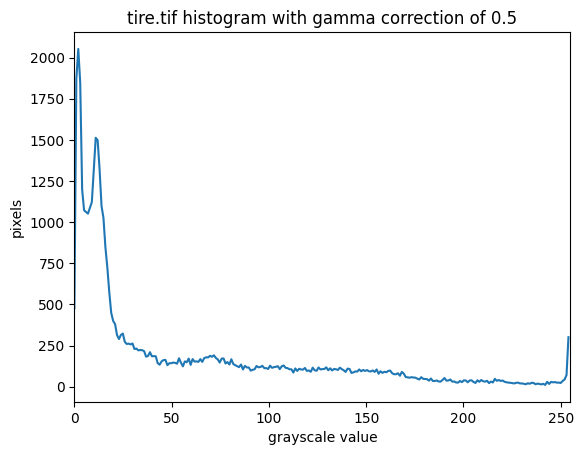

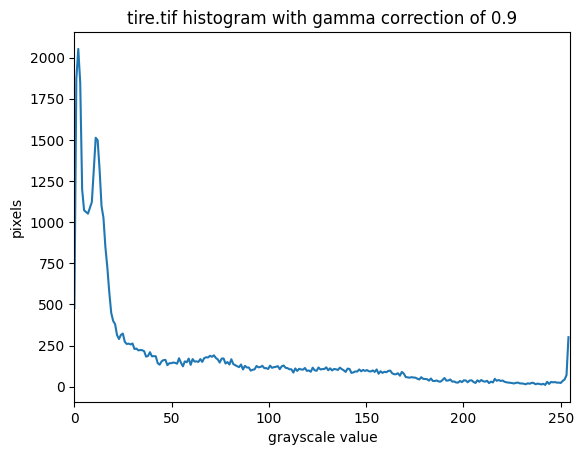

In [13]:
gamma = 0.1;
I2_gamma_corrected = gamma_correction(I2,gamma);

plot_histogram(I2,'tire.tif histogram with gamma correction of 0.1');


gamma = 0.5;
I2_gamma_corrected = gamma_correction(I2,gamma);

plot_histogram(I2,'tire.tif histogram with gamma correction of 0.5');


gamma = 0.9;
I2_gamma_corrected = gamma_correction(I2,gamma);

plot_histogram(I2,'tire.tif histogram with gamma correction of 0.9');

The range $\gamma=0.5$ seems the best. It spreads the distribution of colors while keeping a relative difference between similar colors. We will present the image correction. 

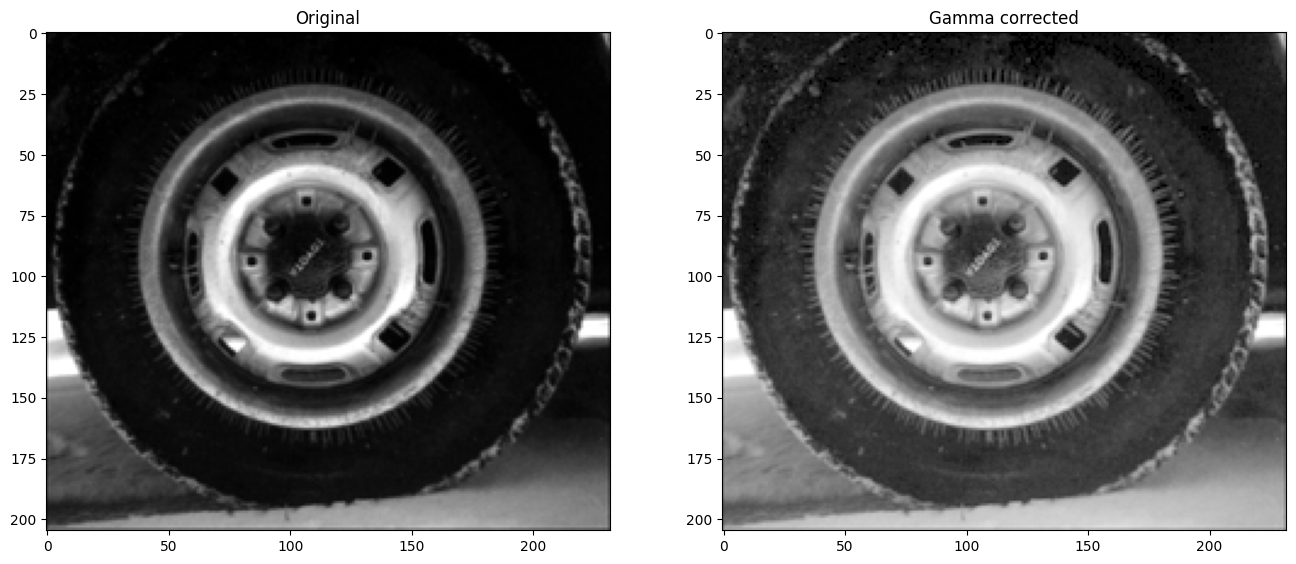

In [14]:
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I2,cmap='gray');
ax.set_title("Original");

gamma = 0.5;
I2_gamma_corrected = gamma_correction(I2,gamma);

ax = plt.subplot(122);
plt.imshow(I2_gamma_corrected,cmap='gray');
ax.set_title("Gamma corrected");

The image is improved in the sense that we can now see the small lines on the rubber, the details in the outer rim of the tire, the details on the metal, and we have a clearer image of the bolts in the center. 

Now, let us compare the results of our contras_streach function to these of the library function. 

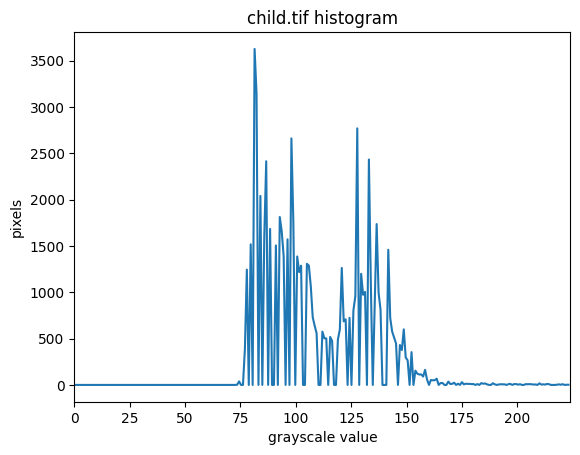

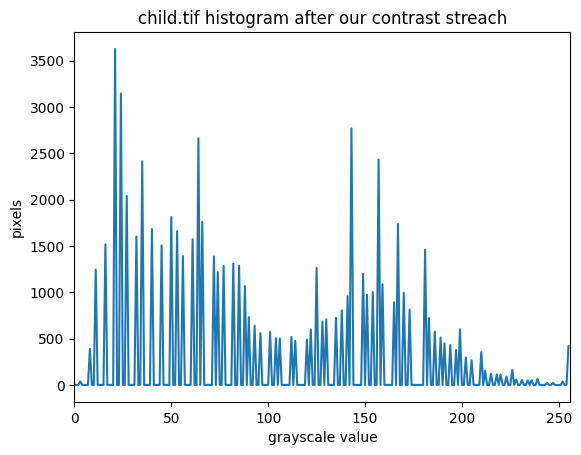

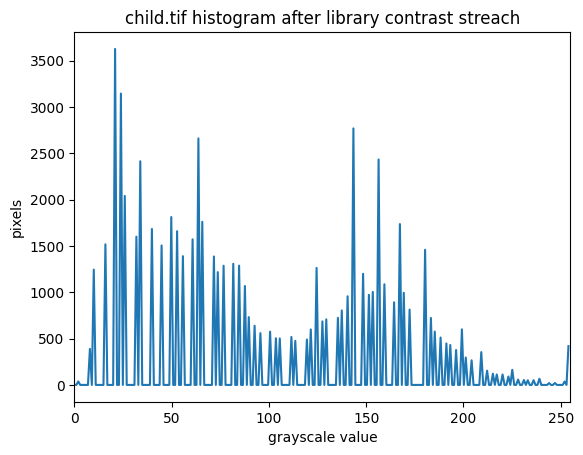

In [15]:
I1 = io.imread('child.tif');
plot_histogram(I1,'child.tif histogram');
I1_streached_ours = contrast_streach(I1,f1,f2,g1,g2);
plot_histogram(I1_streached_ours,'child.tif histogram after our contrast streach');
I1_streached_lib = exposure.rescale_intensity(I1, in_range=(f1,f2), out_range=(g1,g2));
plot_histogram(I1_streached_lib,'child.tif histogram after library contrast streach');


The histograms look very close. We will plot the resulting images, side by side. 

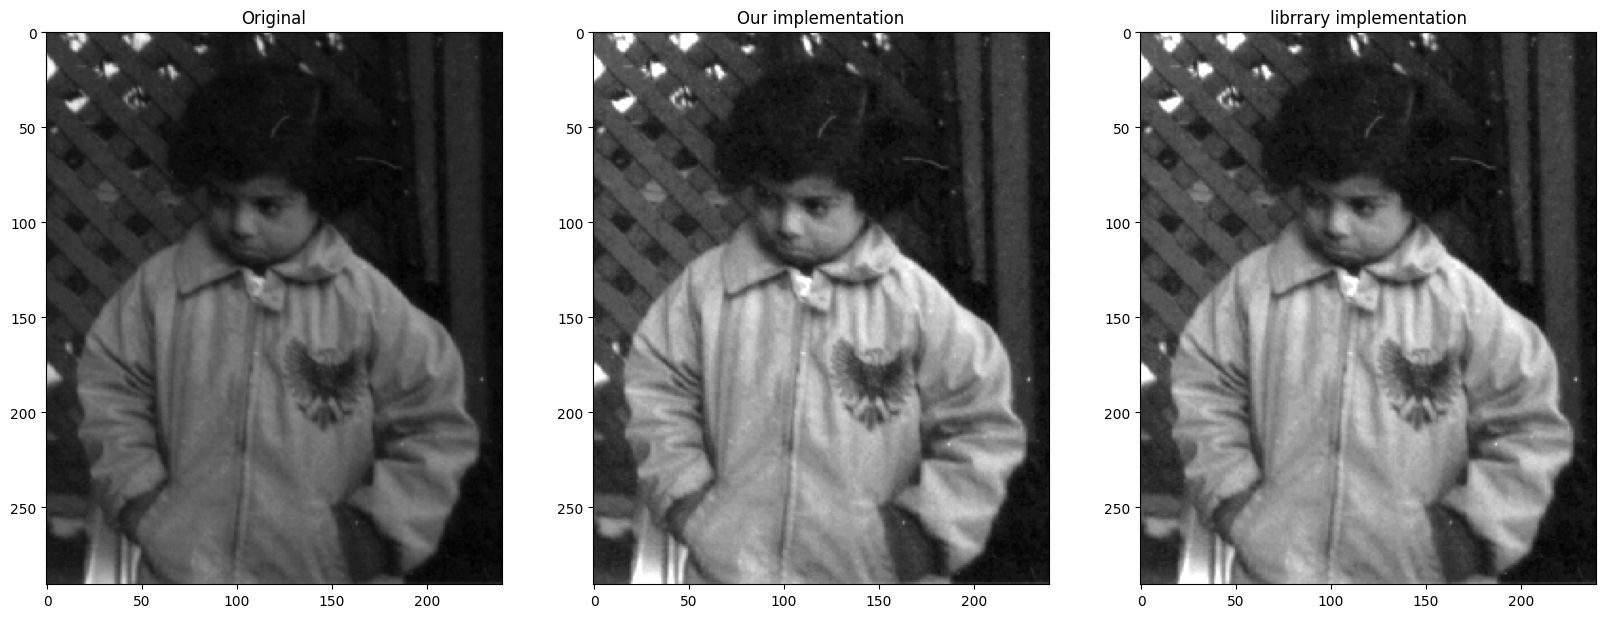

In [16]:
plt.figure(figsize=(20,8));
ax = plt.subplot(131);
plt.imshow(I1,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(132);
plt.imshow(I1_streached_ours,cmap='gray');
ax.set_title("Our implementation");

ax = plt.subplot(133);
plt.imshow(I1_streached_lib,cmap='gray');
ax.set_title("librrary implementation");

We will load 'liftingbody.png' and compare it with 'child.tif'.

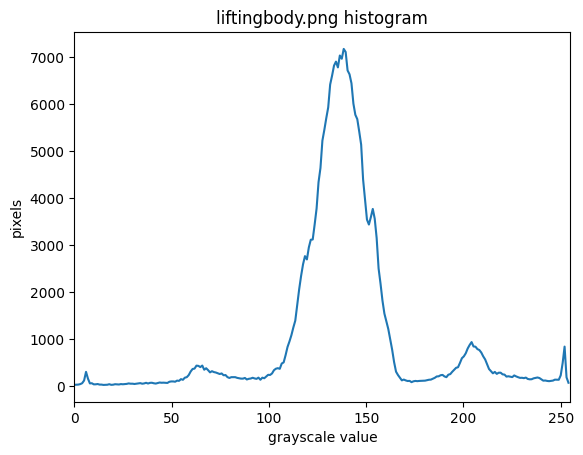

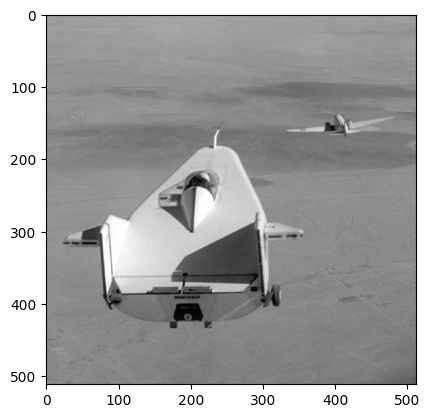

In [17]:
I3 = io.imread('liftingbody.png');
plot_histogram(I3,'liftingbody.png histogram');
plt.imshow(I3,cmap='gray');

Here, the histogram is also mainly concentrated in a specific region ($[110,160]$). However, conversely to 'child.tif', the outer region has large values. Hence, it might not be eliminated by the scaling intensity process. 

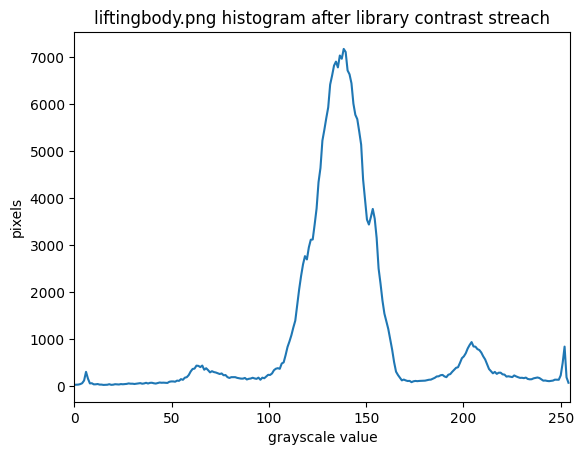

In [18]:
I3_streached_lib = exposure.rescale_intensity(I3);
plot_histogram(I3_streached_lib,'liftingbody.png histogram after library contrast streach');

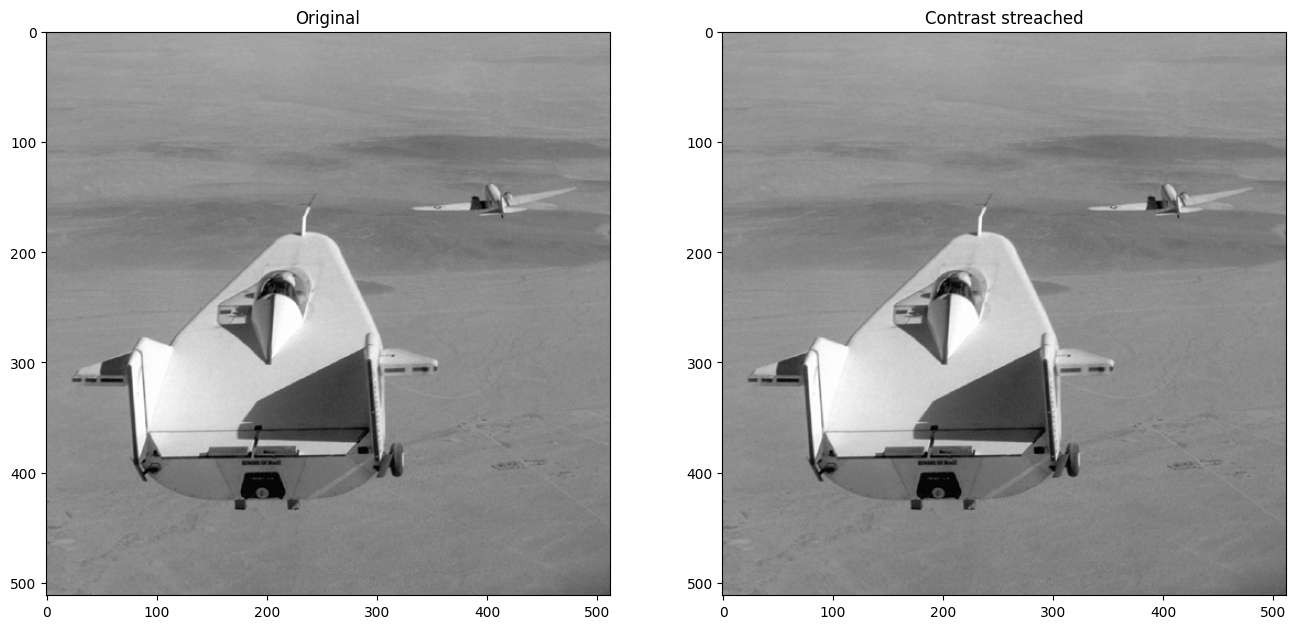

In [19]:
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I3,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(122)
plt.imshow(I3_streached_lib,cmap='gray');
ax.set_title("Contrast streached");



As we suspected, the histogram and image look similar even after performing the contrast stretching. If we will enter the particularly requested range, we will get a different result, as follows:

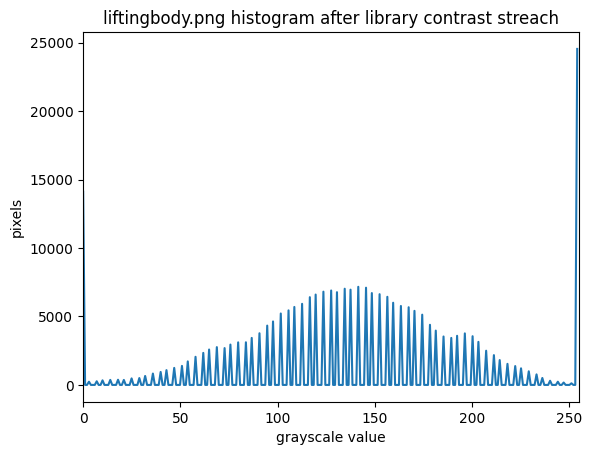

In [20]:
I3_streached_lib = exposure.rescale_intensity(I3, in_range=(100,170), out_range=(0,255));
plot_histogram(I3_streached_lib,'liftingbody.png histogram after library contrast streach');

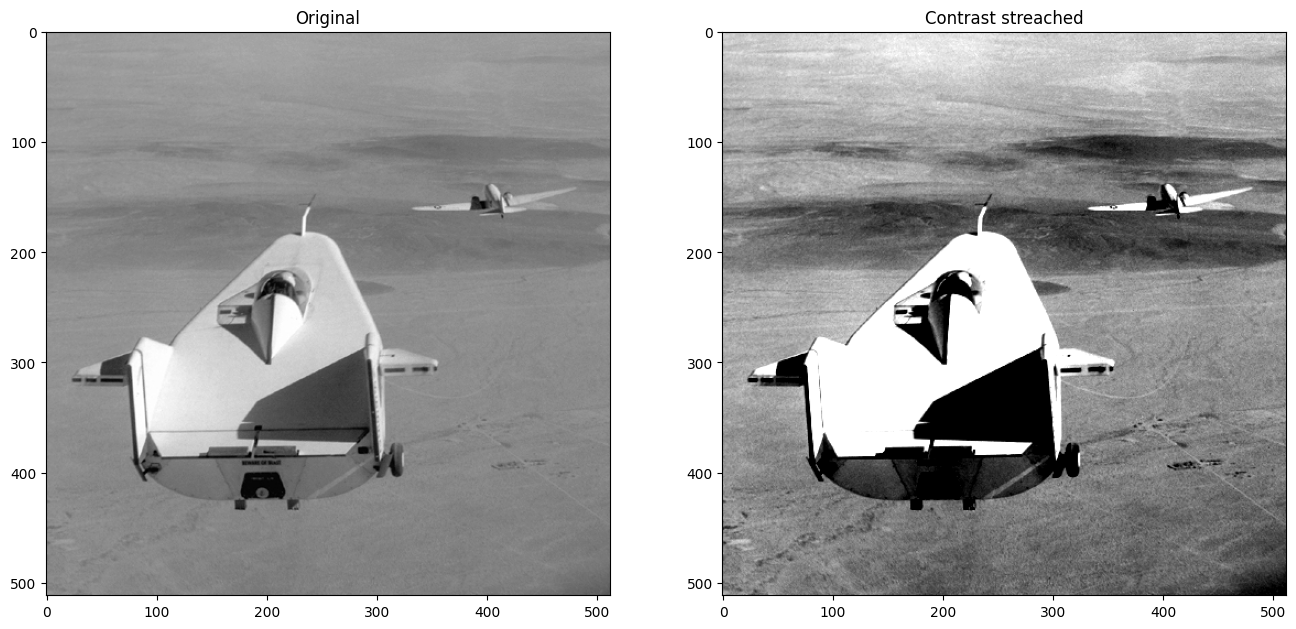

In [21]:
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I3,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(122)
plt.imshow(I3_streached_lib,cmap='gray');
ax.set_title("Contrast streached");


We will load 'rice.png' and proceed to plot the image and histogram. 

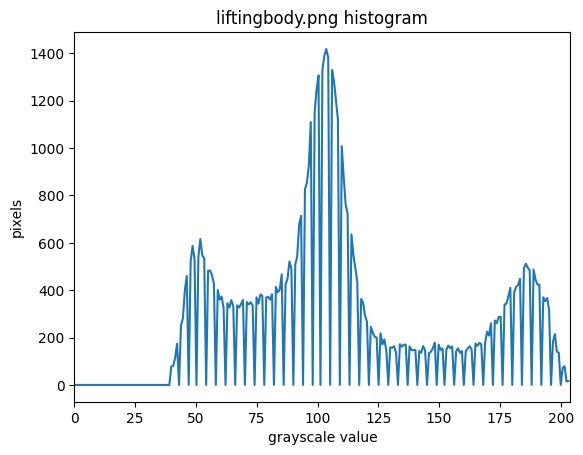

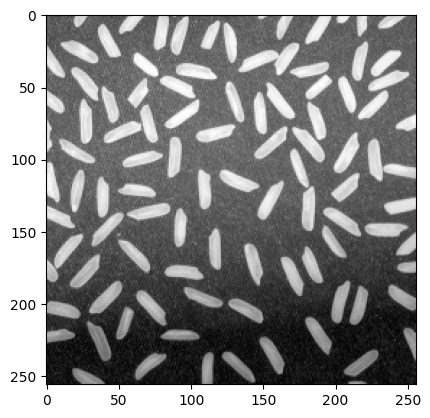

In [22]:
I4 = io.imread('rice.png');
plot_histogram(I4,'liftingbody.png histogram');
plt.imshow(I4,cmap='gray');

We observe three iconic 'picks' for the histogram. We follow the assumption that the rice is generally similar in color. We also note that the background is grainy, and has a gradient of lighting (the bottom is darker and the topis brighter). We assume that the two lower picks belong to the background. We will approximate a threshold between the right-most pick to the center pick, at approximately 150. 

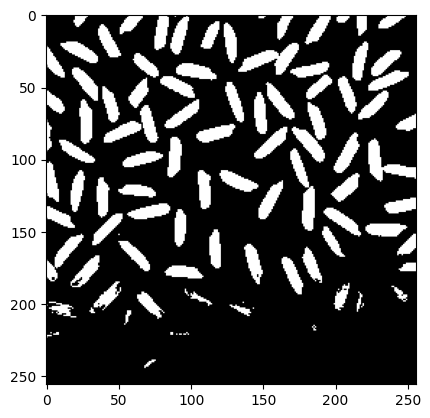

In [35]:
I4_threshed = thresholding(I4,150);
plt.imshow(I4_threshed,cmap='gray');

We could not threshold the image such that all the rice particles will present as $1$ and the background as $0$. This is off course due to the gradient in the background. The rice grain on the darker background has a darker color of white. They fall within a similar shade to the shade of the brighter background at the top. This is why a thresholding operation is not enough to separate the grains from the background in this example. We might be able to solve this by solving with a different threshold for different regions of the image. 

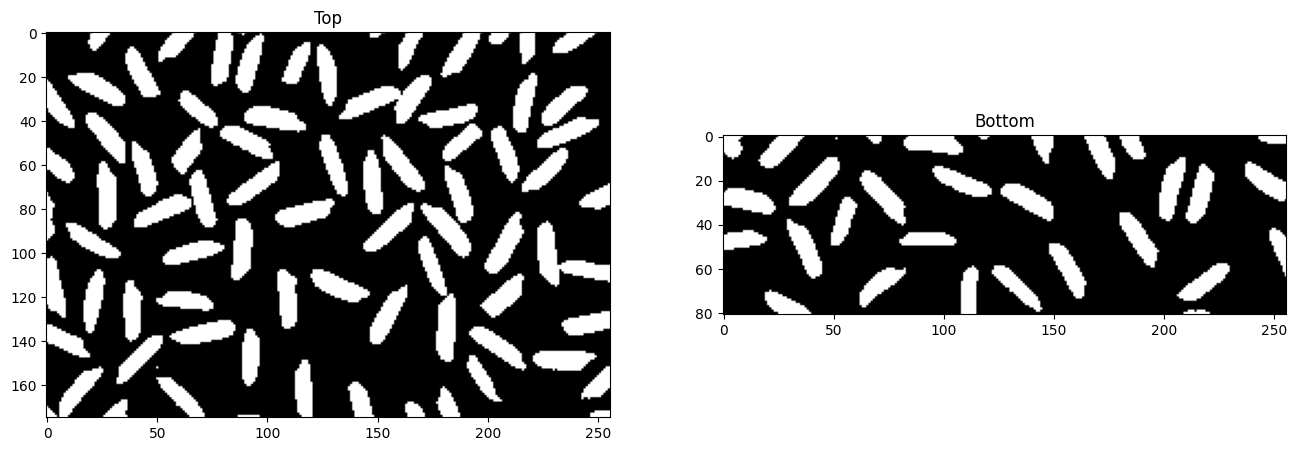

In [24]:
# Devide the image into tow regions, devided on the nth row
n=175
I4_1 = I4[:n,:];
I4_2 = I4[n:,:];

# Aapply thresholding for each region
I4_1_threshed = thresholding(I4_1,150);
I4_2_threshed = thresholding(I4_2,110);

#plot
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I4_1_threshed,cmap='gray');
ax.set_title("Top");

ax = plt.subplot(122)
plt.imshow(I4_2_threshed,cmap='gray');
ax.set_title("Bottom");

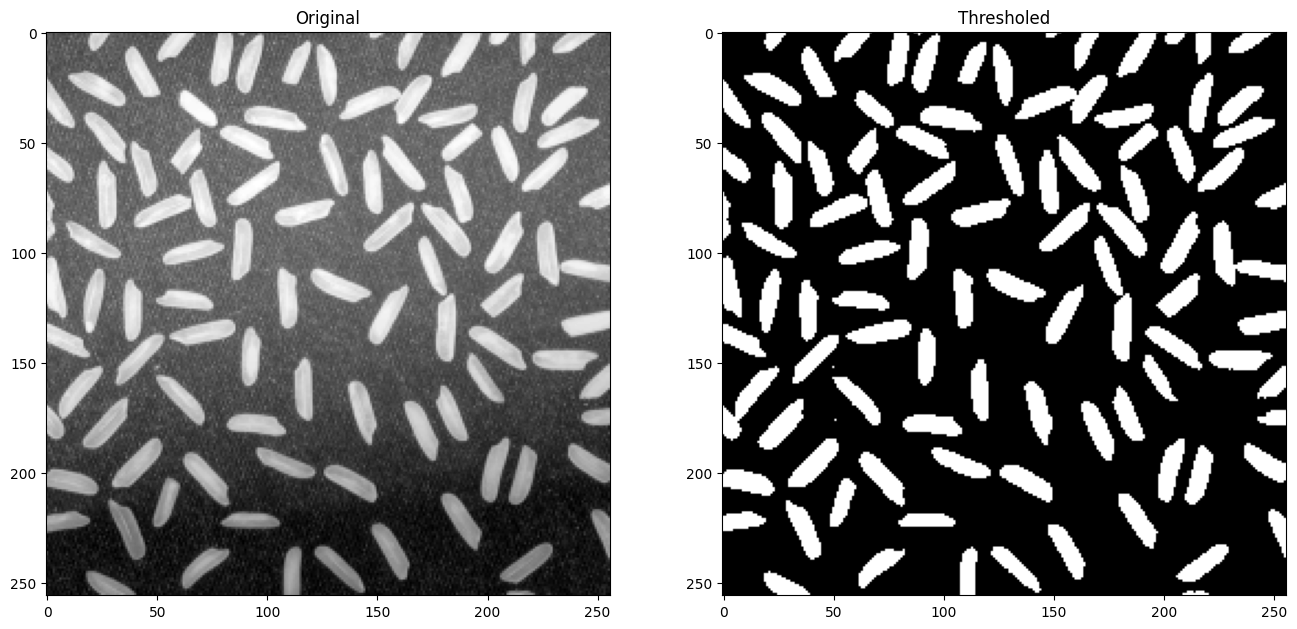

In [25]:
# Reattach images
I4_threshed = np.concatenate((I4_1_threshed, I4_2_threshed), axis=0)

#plot
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I4,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(122)
plt.imshow(I4_threshed,cmap='gray');
ax.set_title("Thresholed");

### LUTs

We will now define a lookup table that transforms an image to its negative. We will then apply it to 'child.tif'.

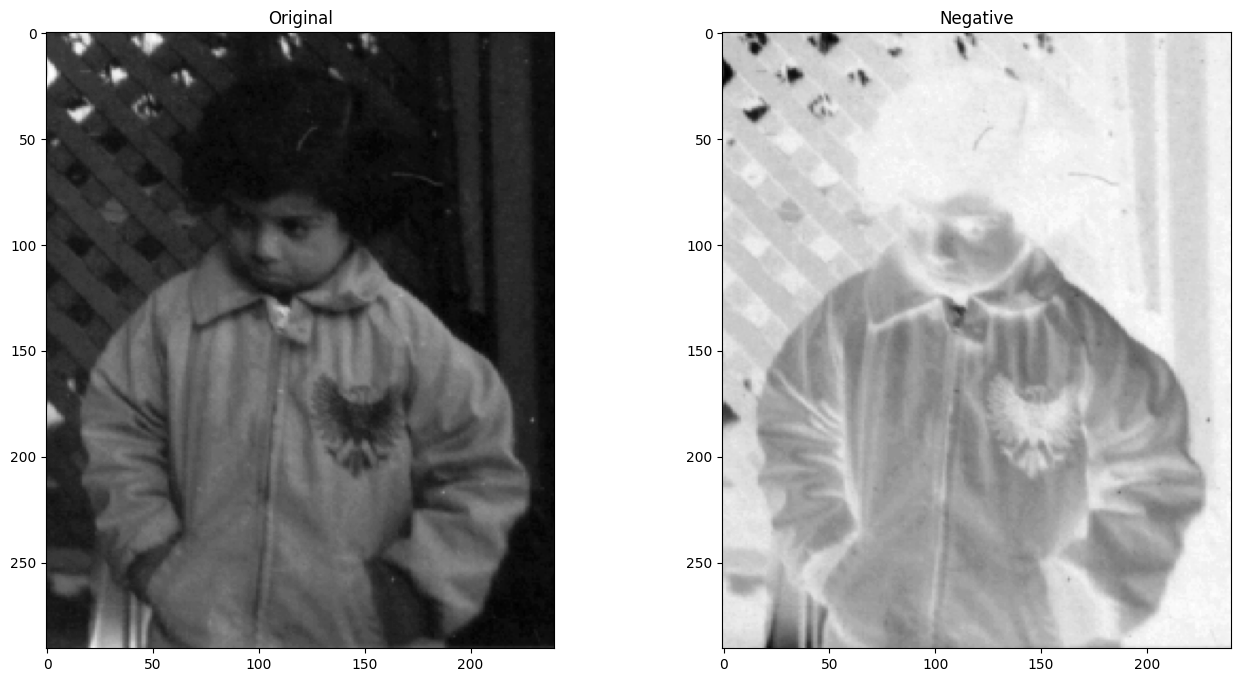

In [26]:
LUT = np.arange(256,0,-1); # define the LUT

# Apply to image:
M,N = I1.shape;
I1_negative = np.zeros((M,N))
for m in range(M):
  for n in range(N):
    I1_negative[m,n] = LUT[I1[m,n]];

# plot the result
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I1,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(122)
plt.imshow(I1_negative,cmap='gray');
ax.set_title("Negative");

We will alter the previous LUT, to keep the even values and negate the odd values. Then, we will apply the LUT to the image and present the results. 

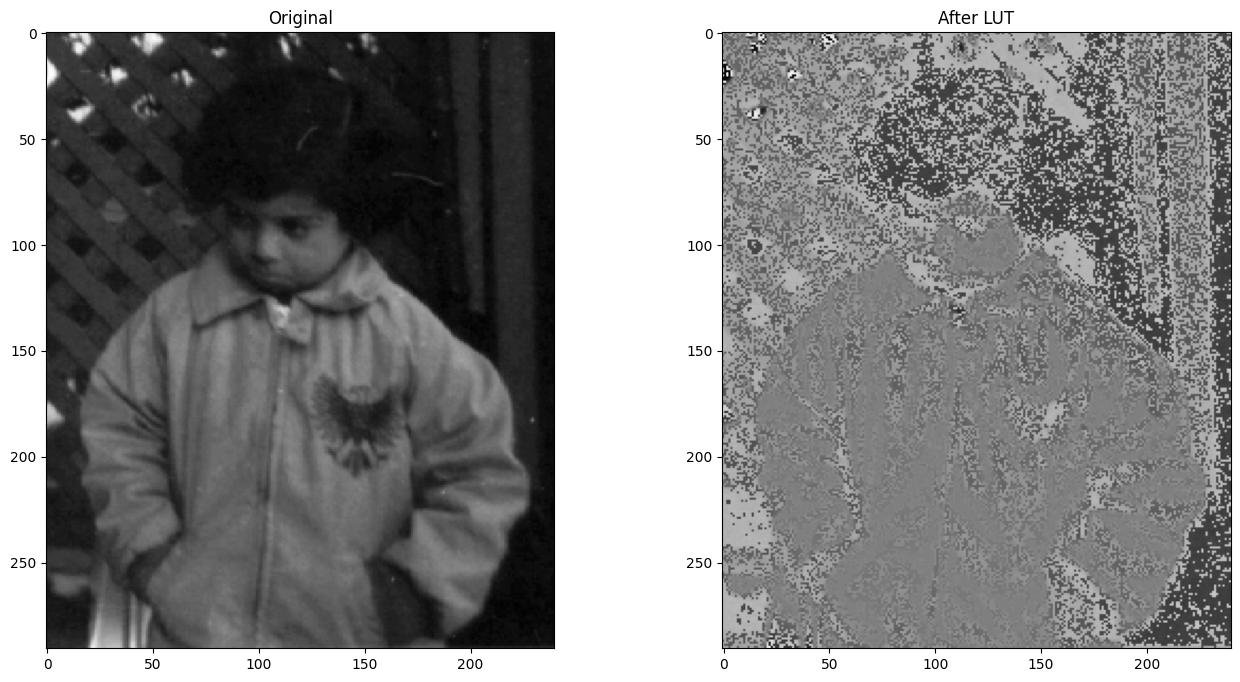

In [27]:
# Adapt the new changes to the LUT
for i in range(256):
  if i%2==0:# Even values keep thier values
    LUT[i] = i;

# Apply to image:
I1_LUTed = np.zeros((M,N))
for m in range(M):
  for n in range(N):
    I1_LUTed[m,n] = LUT[I1[m,n]];

# plot the result
plt.figure(figsize=(16,8));
ax = plt.subplot(121);
plt.imshow(I1,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(122)
plt.imshow(I1_LUTed,cmap='gray');
ax.set_title("After LUT");

In [28]:
I5 = io.imread('Winter_Forest.jpg');
plt.imshow(I5);


FileNotFoundError: No such file: 'c:\Users\idosh\Ido\Image_Processing\Lab1\Winter_Forest.jpg'

We wish to emphasize the red of the sun in the image. Let us look at the histograms: 

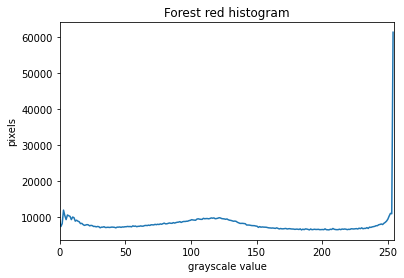

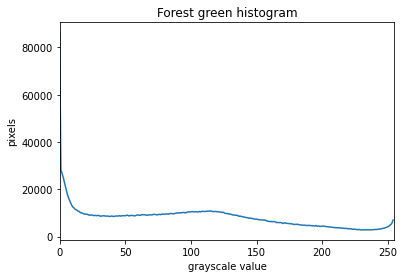

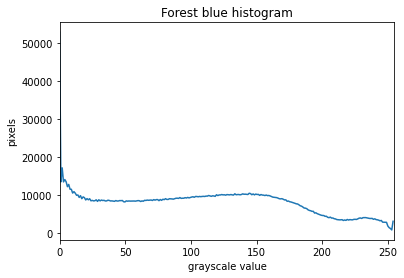

In [ ]:
R = I5[:,:,0];
G = I5[:,:,1];
B = I5[:,:,2];


plot_histogram(R,'Forest red histogram');
plot_histogram(G,'Forest green histogram');
plot_histogram(B,'Forest blue histogram');


The red is concentrated on the high end. We want to either, improve the balance, or perform gamma correction. We will apply a number of $\gamma$ values and test for a nice fit. 

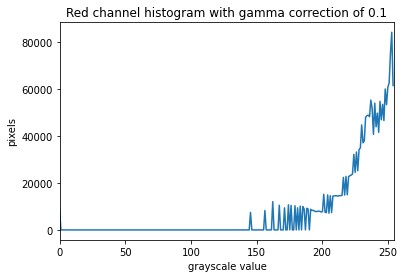

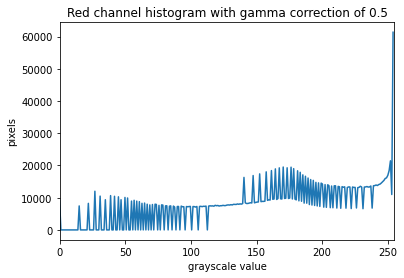

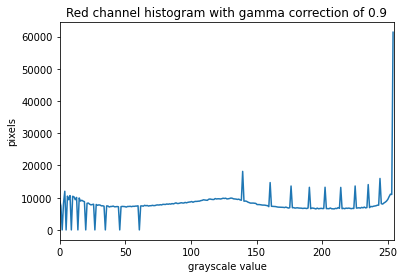

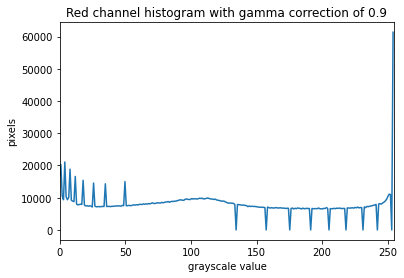

In [ ]:
gamma = 0.1;
R_g = exposure.adjust_gamma(R,gamma);
plot_histogram(R_g,'Red channel histogram with gamma correction of 0.1');

gamma = 0.5;
R_g = exposure.adjust_gamma(R,gamma);
plot_histogram(R_g,'Red channel histogram with gamma correction of 0.5');

gamma = 0.9;
R_g = exposure.adjust_gamma(R,gamma);
plot_histogram(R_g,'Red channel histogram with gamma correction of 0.9');

gamma = 1.1;
R_g = exposure.adjust_gamma(R,gamma);
plot_histogram(R_g,'Red channel histogram with gamma correction of 0.9');

$\gamma=0.5$ gives a nice spread of the red channel. We will compare to a simple contrast stretch on that channel. 

In [ ]:
gamma = 0.5;
R_g = exposure.adjust_gamma(R,gamma);
R_e = exposure.equalize_hist(R);

I5_g = np.stack((R_g,G,B), axis=2);
I5_e = np.stack((R_e,G,B), axis=2);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


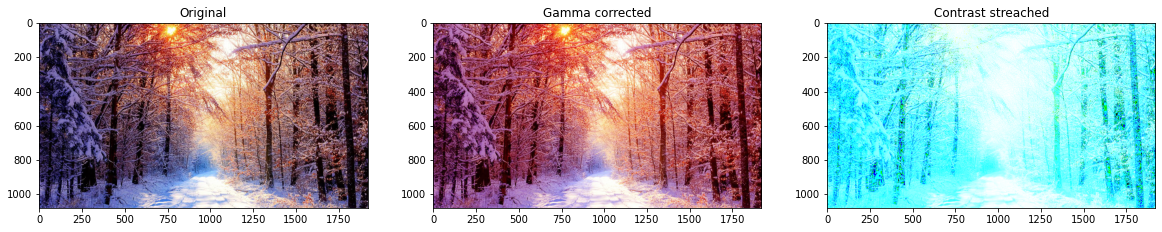

In [ ]:
# plot the result
plt.figure(figsize=(20,8));
ax = plt.subplot(131);
plt.imshow(I5,cmap='gray');
ax.set_title("Original");

ax = plt.subplot(132);
plt.imshow(I5_g,cmap='gray');
ax.set_title("Gamma corrected");

ax = plt.subplot(133);
plt.imshow(I5_e,cmap='gray');
ax.set_title("Contrast streached");

The gamma correction looks much nicer, emphasizing the reds while keeping its relatively high values with respect to other colors.  